In [1]:
from __future__ import print_function, division
import os, bz2, json, time, tqdm
from datetime import timedelta, datetime

import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import colors

In [2]:
categories = ["activism","autos","comedy","education","entertainment", \
              "film","gaming","howto","movies","music",\
              "news","people","pets","science","shows",\
              "sports","trailers","travel"]

categories_eligible = ["autos","comedy","education","entertainment", \
                       "film","gaming","howto","music",\
                       "news","people","science","sports",\
                       "travel"]

eval_days = [90, 135, 180, 225, 270]

In [3]:
dataset_base = "/Users/zhuxinqi/Documents/online_attention/engagement'16/tweeted_videos"
test_category = categories_eligible[7]

with open(os.path.join(dataset_base, test_category+".json"), "r") as f:
    dataset_json = f.readlines()

In [4]:
# dict-like dataset
dataset = {}
# attributes
vids_set = set()
vids = []
days = []
views = []
shares = []
watches = []

day_missing_record_cnt = 0
total = 0
for line in tqdm.tqdm(dataset_json):
    total += 1
    record = json.loads(line)
    try:
        category_id = int(record['snippet']['categoryId'])
        day = [int(x) for x in record['insights']['days'].split(",")]
        
        """!!!"""
        if len(day) - 1 >= day[-1]: continue
        day_missing_record_cnt += 1

        view = [int(x) for x in record['insights']['dailyView'].split(",")]
        share = [int(x) for x in record['insights']['dailyShare'].split(",")]
        watch = [float(x) for x in record['insights']['dailyWatch'].split(",")]
    except:
        continue
    dataset[record['id']] = (category_id, day, view, share, watch)
    
    if record['id'] in vids_set:
        continue
    vids_set.add(record['id'])
    
    vids.append(record['id'])
    days.append(day)
    views.append(view)
    shares.append(share)
    watches.append(watch)
print("dataset size:", "{}/{}".format(day_missing_record_cnt, total))

100%|███████████████████████████████████████████████████████████████████████████████████| 449314/449314 [01:49<00:00, 4118.66it/s]

dataset size: 346340/449314


['gCbvEzxgiD8', '_f8w68t11Ag', 'U8diRBnsREM', 'z72AoMrZslg', '7TX4hL5YVfU']


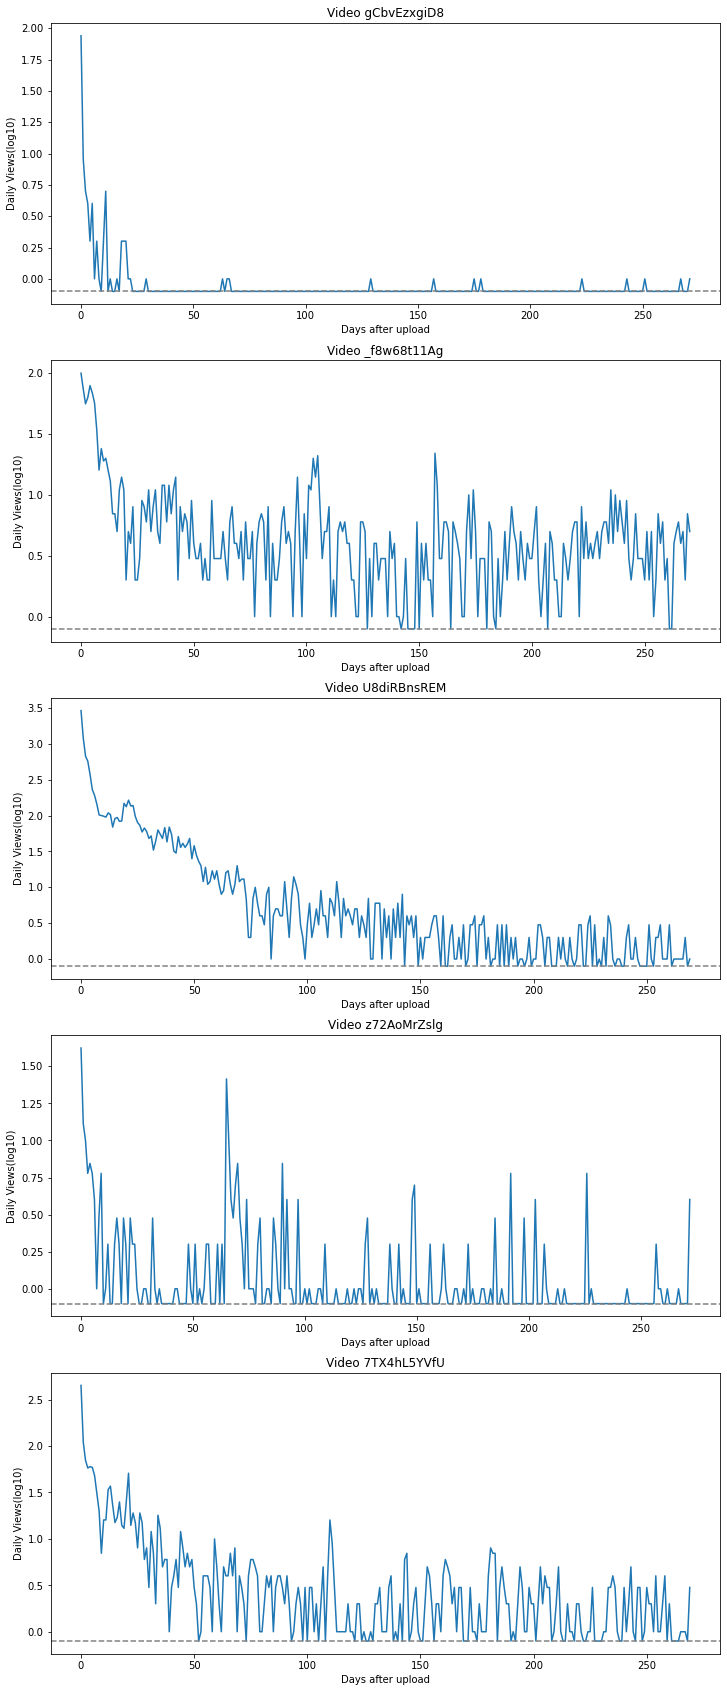

In [5]:
samples = list(dataset.keys())[0:5]
# samples = ['pFMj8KL8nJA']
print(samples)

fig = plt.figure(figsize=(12, 6*len(samples)))
for i, vid in enumerate(samples):
    ax = fig.add_subplot(len(samples),1,i+1)
    day = dataset[vid][1]
    xs = []
    ys = []
    ptr = 0
    for j in range(day[-1]+1):
        if day[ptr]==j:
            xs.append(dataset[vid][1][ptr])
#             ys.append(dataset[vid][2][ptr])
            ys.append(math.log(dataset[vid][2][ptr], 10))
            ptr += 1
        else:
            xs.append(j)
#             ys.append(0)    
            ys.append(-0.1)
    ax.plot(xs, ys)
#     ax.axhline(y=0, color='grey', linestyle='dashed')
    ax.axhline(y=-0.1, color='grey', linestyle='dashed')
    
    ax.set_xlabel("Days after upload")
    ax.set_ylabel("Daily Views(log10)")
    ax.set_title("Video "+vid)